In [ ]:
#yes
from google.colab import drive
drive.mount('/content/drive/')
!ls

Mounted at /content/drive/
drive  sample_data


In [ ]:
#yes
import os
os.chdir('drive/MyDrive/661_shared_project/mmsegmentation/')
!ls

In [ ]:
#yes
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

In [ ]:
#yes
!pip install -v -e .

In [ ]:
#yes
import mmcv
import mmseg

print(mmcv.__version__)
print(mmseg.__version__)



2.1.0
1.2.1


In [ ]:
#yes
!pip install ftfy

<h2>Step 2 : Create, Visualize Dataset and Document Statistics

***Create Datasets***

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import scipy
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def create_dataset(paths):
    ''' creates X,y datasets of all the images that have a valid fluid array/truth value'''
    x = []
    y = []

    for path in tqdm(paths):
        mat = scipy.io.loadmat(path)
        img_tensor = mat['images']
        print(img_tensor.shape)
        fluid_tensor = mat['manualFluid1']
        img_array = np.transpose(img_tensor, (2, 0, 1))
        manual_fluid_array = np.transpose(fluid_tensor, (2, 0, 1))

        """
        img_array = np.transpose(img_tensor, (2, 0 ,1)) / 255 #normalising
        img_array = resize(img_array, (img_array.shape[0], width, height))
        fluid_array = np.transpose(fluid_tensor, (2, 0 ,1))
        fluid_array = thresh(fluid_array)
        fluid_array  = resize(fluid_array, (fluid_array .shape[0], width_out, height_out))
         """
        for idx, man in enumerate(manual_fluid_array):
          if not np.all(np.isnan(man)):
            #convert to w x h x 3
            new_img = np.reshape(img_array[idx], (img_array[idx].shape[0], img_array[idx].shape[1], 1))
            new_img = cv2.cvtColor(new_img,cv2.COLOR_GRAY2RGB)

            #we prob have to convert this array later too
            #new_fluid = np.reshape(manual_fluid_array[idx], (manual_fluid_array[idx].shape[0], manual_fluid_array[idx].shape[1], 1)).astype('uint8') * 255 #astype needed for coversion
            #new_fluid = cv2.cvtColor(new_fluid,cv2.COLOR_GRAY2RGB)

            x.append(new_img)
            y.append(manual_fluid_array[idx])
    return np.array(x), np.array(y)

In [ ]:
#code referenced from: https://www.kaggle.com/code/atrichatterjee7/unet-imagesegmentation

input_path = os.path.join('2015_BOE_Chiu') #uploaded folder inside mm segmentation folder
subject_path = [os.path.join(input_path, 'Subject_0{}.mat'.format(i)) for i in range(1, 10)] + [os.path.join(input_path, 'Subject_10.mat')]

x_full, y_full = create_dataset(subject_path)
x_train, x_val, y_train, y_val = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

 10%|█         | 1/10 [00:03<00:35,  3.93s/it]

(496, 768, 61)


 20%|██        | 2/10 [00:06<00:27,  3.39s/it]

(496, 768, 61)


 30%|███       | 3/10 [00:09<00:22,  3.22s/it]

(496, 768, 61)


 40%|████      | 4/10 [00:12<00:16,  2.83s/it]

(496, 768, 61)


 50%|█████     | 5/10 [00:15<00:14,  2.86s/it]

(496, 768, 61)


 60%|██████    | 6/10 [00:18<00:11,  2.97s/it]

(496, 768, 61)


 70%|███████   | 7/10 [00:21<00:09,  3.10s/it]

(496, 768, 61)


 80%|████████  | 8/10 [00:24<00:06,  3.05s/it]

(496, 768, 61)


 90%|█████████ | 9/10 [00:28<00:03,  3.41s/it]

(496, 768, 61)


100%|██████████| 10/10 [00:31<00:00,  3.18s/it]

(496, 768, 61)


In [ ]:
#save X imgs in img_dir

folder_train_img = "./data/oct_dataset_v2/img_dir/train/"
folder_test_img = "./data/oct_dataset_v2/img_dir/val/"
# Iterate through x_train and convert to RGB
for idx, img in enumerate(x_train):
    cv2.imwrite(folder_train_img+ "output_" + str(idx) + ".jpg", np.array(img)) #problem fixed: img needed to be an array -emma

for idx, img in enumerate(x_val):
    cv2.imwrite(folder_test_img+ "output_" + str(idx) + ".jpg", np.array(img))

In [ ]:
#save fluid imgs (y) in annot_ir

folder_train_annot = "./data/oct_dataset_v2/annot_dir/train/"
folder_test_annot = "./data/oct_dataset_v2/annot_dir/val/"
# Iterate through x_train and convert to RGB
for idx, img in enumerate(y_train):
    cv2.imwrite(folder_train_annot+ "output_" + str(idx) + ".png", np.array(img)) #problem fixed: img needed to be an array -emma

for idx, img in enumerate(y_val):
    cv2.imwrite(folder_test_annot+ "output_" + str(idx) + ".png",img) #this converts the img to grayscale bc its technically 1 channel but shows colored

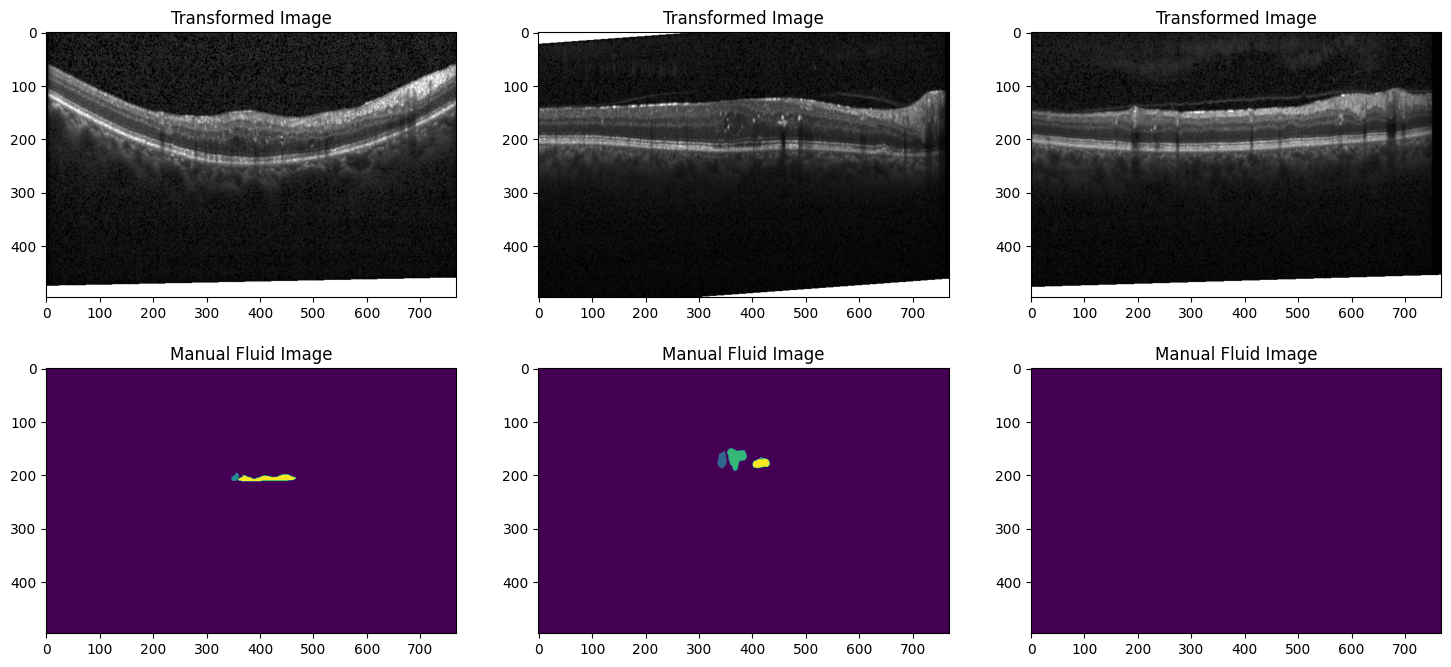

In [ ]:
#visualize datasets
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,4*2))
ax[0][0].set_title("Transformed Image")
ax[0][0].imshow(x_train[0])
ax[0][1].set_title("Transformed Image")
ax[0][1].imshow(x_train[1])
ax[0][2].set_title("Transformed Image")
ax[0][2].imshow(x_train[2])

ax[1][0].set_title("Manual Fluid Image")
ax[1][0].imshow(y_train[0])
ax[1][1].set_title("Manual Fluid Image")
ax[1][1].imshow(y_train[1])
ax[1][2].set_title("Manual Fluid Image")
ax[1][2].imshow(y_train[3])

In [ ]:
print( x_train.shape, y_train.shape, x_val.shape)

(88, 496, 768, 3) (88, 496, 768) (22, 496, 768, 3)


**Visualize Original Data in Subject Path 1 and print out stats**

orig shapes:  (496, 768, 61) (496, 768, 61)
transposed shapes: (61, 496, 768) (61, 496, 768)


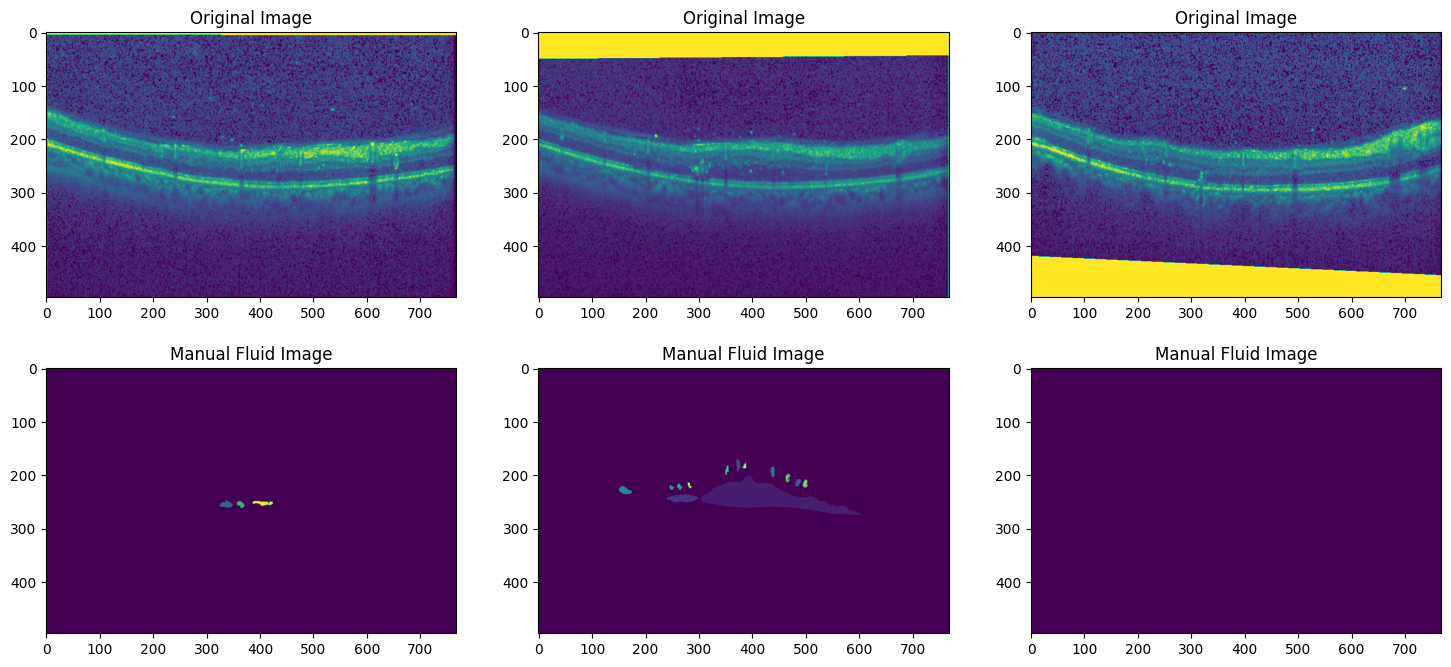

In [ ]:
#Orignal Images, without converting to 3 channel
mat = scipy.io.loadmat(subject_path[0])
img_tensor = mat['images']
manual_fluid_tensor_1 = mat['manualFluid1']
print("orig shapes: ",img_tensor.shape, manual_fluid_tensor_1.shape)

img_array = np.transpose(img_tensor, (2, 0, 1))
manual_fluid_array = np.transpose(manual_fluid_tensor_1, (2, 0, 1))

print("transposed shapes:", img_array.shape, manual_fluid_array.shape)

#chosen indexes to visualize images and fluid from subject path 1
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,4*2))
ax[0][0].set_title("Original Image")
ax[0][0].imshow(img_array[5])
ax[0][1].set_title("Original Image")
ax[0][1].imshow(img_array[10])
ax[0][2].set_title("Original Image")
ax[0][2].imshow(img_array[50])

ax[1][0].set_title("Manual Fluid Image")
ax[1][0].imshow(manual_fluid_array[10])
ax[1][1].set_title("Manual Fluid Image")
ax[1][1].imshow(manual_fluid_array[25].astype(int))
ax[1][2].set_title("Manual Fluid Image")
ax[1][2].imshow(manual_fluid_array[50])

<h1>Notes from Emma:
Dec 11

can use command line arguments to finetune many things, check it out here: <br>
---can also change the # of required channels
https://github.com/open-mmlab/mmsegmentation/blob/main/docs/en/user_guides/1_config.md#Modify-config-through-script-arguments

**Model Selection**


In [ ]:
from mmseg.apis import MMSegInferencer
# models is a list of model names, and them will print automatically
models = MMSegInferencer.list_models('mmseg')

can say we ran the two models below and pascal context showed much more segmentation blocks on the image, so we thought we could work further with the pascal trained mdoel

In [ ]:
#no more
from mmseg.apis import MMSegInferencer
model_name =
# Load models into memory
inferencer = MMSegInferencer(model= 'fcn_r101-d8_4xb4-40k_pascal-context-480x480', classes = ['Fluid', 'non-fluid'], palette = ['red','blue'])#error might have something to do with number of classes
# Inference
#inferencer('demo/demo.png', show=True)

# out_dir is the directory to save the output results, img_out_dir and pred_out_dir are subdirectories of out_dir
# to save visualized rendering color maps and predicted results
inferencer(list(x_val), show=True, out_dir='test_outputs', img_out_dir='img_out_dir', pred_out_dir='pred_out_dir')

In [ ]:
#no more
from mmseg.apis import MMSegInferencer
model_name = 'pspnet_r50-d8_4xb4-40k_voc12aug-512x512'
# Load models into memory
inferencer = MMSegInferencer(model= model_name, classes = ['Fluid', 'non-fluid'], palette = ['red','blue'])#error might have something to do with number of classes
# Inference
#inferencer('demo/demo.png', show=True)

# out_dir is the directory to save the output results, img_out_dir and pred_out_dir are subdirectories of out_dir
# to save visualized rendering color maps and predicted results
inferencer(list(x_val), show=True, out_dir=f'test_outputs_{model_name}', img_out_dir='img_out_dir', pred_out_dir='pred_out_dir')



In [ ]:
#Dont run anymore
#this model name list was generated by searching through all the models for r50-d8_4xb4-40
model_name_lst = ['ann_r50-d8_4xb4-40k_voc12aug-512x512',
'apcnet_r50-d8_4xb4-80k_ade20k-512x512',
'ccnet_r50-d8_4xb4-40k_voc12aug-512x512',
'danet_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3_r50-d8_4xb4-40k_coco-stuff10k-512x512',
'deeplabv3plus_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3plus_r50-d8_4xb4-40k_pascal-context-480x480',
'fcn_r50-d8_4xb4-40k_voc12aug-512x512',
'gcnet_r50-d8_4xb4-40k_voc12aug-512x512',
'isanet_r50-d8_4xb4-40k_voc12aug-512x512',
'nonlocal_r50-d8_4xb4-40k_voc12aug-512x512',
'psanet_r50-d8_4xb4-40k_voc12aug-512x512',
'pspnet_r50-d8_4xb4-40k_coco-stuff10k-512x512' ]

In [ ]:
from mmseg.apis import MMSegInferencer
model_name_lst = ['ccnet_r50-d8_4xb4-40k_voc12aug-512x512',
'danet_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3_r50-d8_4xb4-40k_coco-stuff10k-512x512',
'deeplabv3plus_r50-d8_4xb4-40k_voc12aug-512x512',
'deeplabv3plus_r50-d8_4xb4-40k_pascal-context-480x480',
'fcn_r50-d8_4xb4-40k_voc12aug-512x512',
'gcnet_r50-d8_4xb4-40k_voc12aug-512x512',
'isanet_r50-d8_4xb4-40k_voc12aug-512x512',
'nonlocal_r50-d8_4xb4-40k_voc12aug-512x512',
'psanet_r50-d8_4xb4-40k_voc12aug-512x512',
'pspnet_r50-d8_4xb4-40k_coco-stuff10k-512x512' ]

In [ ]:
for model_name in model_name_lst:
  # Load models into memory
  inferencer = MMSegInferencer(model= model_name, classes = ['Fluid', 'non-fluid'], palette = ['red','blue'])#error might have something to do with number of classes
  # Inference
  #inferencer('demo/demo.png', show=True)

  # out_dir is the directory to save the output results, img_out_dir and pred_out_dir are subdirectories of out_dir
  # to save visualized rendering color maps and predicted results
  inferencer(list(x_val), show=True, out_dir=f'test_outputs_{model_name}', img_out_dir='img_out_dir', pred_out_dir='pred_out_dir')

In [ ]:
#First attempt at finetuning what we believe is a good model starting point
model_name = 'deeplabv3plus_r50-d8_4xb4-40k_pascal-context-480x480'
fine_tune_iteration = '1'
# Load models into memory
#removed classes argument
inferencer = MMSegInferencer(model= model_name)#error might have something to do with number of classes
# Inference
#inferencer('demo/demo.png', show=True)

# out_dir is the directory to save the output results, img_out_dir and pred_out_dir are subdirectories of out_dir
# to save visualized rendering color maps and predicted results
inferencer(list(x_val), show=True, out_dir=f'test_outputs_{model_name}_finetune_{fine_tune_iteration}', img_out_dir='img_out_dir', pred_out_dir='pred_out_dir')
